In [1]:
#importing necessary modules

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#creating a dataframe to score features of the data

bhd = pd.DataFrame(boston['data'], columns = boston['feature_names'])

In [6]:
bhd.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [7]:
#adding the target variable

bhd['price'] = boston['target']

In [8]:
bhd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = bhd[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = bhd['price']

In [11]:
#Splitting data into training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
#training the model

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lm.coef_

array([-1.18011920e-01,  4.51265343e-02,  3.63892941e-02,  2.90833643e+00,
       -1.94624220e+01,  3.45111489e+00,  7.94345096e-03, -1.48493805e+00,
        3.11422711e-01, -1.00799468e-02, -9.25338713e-01,  1.06353209e-02,
       -5.65119212e-01])

In [15]:
#Coefficients of features

cdf = pd.DataFrame(lm.coef_, X_train.columns, columns = ['Coefficiets'])
cdf

,Coefficiets
CRIM,-0.118012
ZN,0.045127
INDUS,0.036389
CHAS,2.908336
NOX,-19.462422
RM,3.451115
AGE,0.007943
DIS,-1.484938
RAD,0.311423
TAX,-0.010080


In [16]:
#predictions of the model

predictions = lm.predict(X_test)

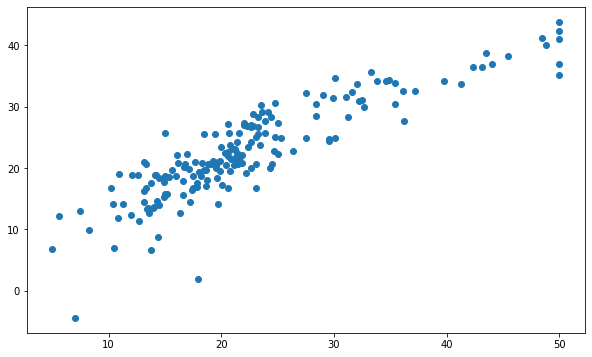

In [17]:
# Comparing predictions with actual prices using scatter

plt.figure(figsize = (10,6))
plt.scatter(y_test,predictions)

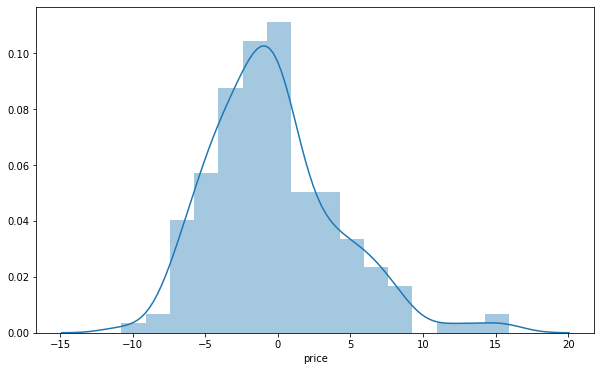

In [18]:
#comparing distribution of residuals

plt.figure(figsize = (10,6))
sns.distplot(y_test-predictions)

In [19]:
from sklearn import metrics

In [24]:
#getting performance metrics for the model

print('MAE: ', metrics.mean_absolute_error(y_test,predictions))

MAE:  3.3991439604870375


In [25]:
print('MAE: ', metrics.mean_squared_error(y_test,predictions))

MAE:  19.509868827552722


In [26]:
print('MAE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  4.416997716498472
